# Introduction to Deep Learning with TensorFlow

In this notebook, we will go over the basics of Deep Learning using TensorFlow 2. TensorFlow is a framework which allows manipulations of tensors using constructs similar to numpy. In addition it has modules to allow auto differentiation to carryout back-propagation which forms the backbone of training a neural network.

Prior to version 2, TensorFlow had two phases, first phase to build graph of computation and then in 2nd phase using `session` to pass data through the grapah and run back propagation. However with the introduction of eager execution in Tensorflow 2.X, it now has simplified a lot and the differences between PyTorch and TensorFlow have become very narrow. 

Ofcourse for production setup, you could still use the pre-complied graph to speed up things.

## What are Neural Networks

Deep learning is based on Artificial Neural networks which are made up of neurons. A neuron takes inputs, calculates the weighted sum and then passes the sum through some kind of non-linear function (called activation function) as shown below:

![Neuron](./images/neuron.png "Neuron")

<br/>
<br/>

We stack these neurons to make a neural network as shown below:
![Neuron](./images/nn.svg "Neuron")

Let us now create a neural network in PyTorch. We will use this network to train a model to take MNIST data as input and produce the class it belongs to.


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

2023-10-03 11:43:44.215965: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-03 11:43:44.284419: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-03 11:43:44.284482: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-03 11:43:44.284514: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-03 11:43:44.297200: I tensorflow/core/platform/cpu_feature_g

### MNIST 

MNIST dataset has images 28x28 pixels  = 784 pixels. 

We will have 10 units at the output layer to signify the digit (0-9) the image belongs to.

Let us first load the data and print some images

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 3s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

image size of `(60000,28,28)` means that we have 60000 images in the x_train dataset , with each image of size (28x28) (height x width)

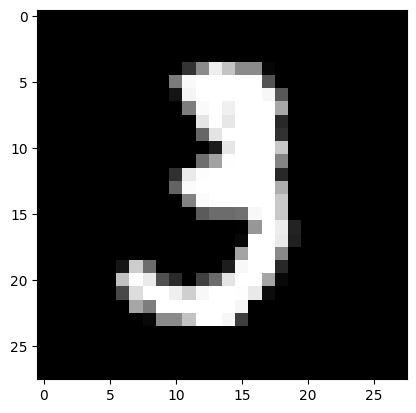

In [5]:
# Let us plot one image
plt.imshow(x_train[10].squeeze(), cmap='Greys_r')

### Build Network

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(192, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 192)               150720    
                                                                 
 dense_1 (Dense)             (None, 128)               24704     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 176714 (690.29 KB)
Trainable params: 176714 (690.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Forward pass and Calculate Cross Entropy Loss

In [7]:
# function to view the probability of classification of digit
def view_classification(img, probs):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,7), ncols=2)
    ax1.imshow(img)
    ax1.axis('off')
    ax2.barh(np.arange(10), probs)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10).astype(int), size='large');
    ax2.set_title('Probability')
    ax2.set_xlim(0, 1.1)
    

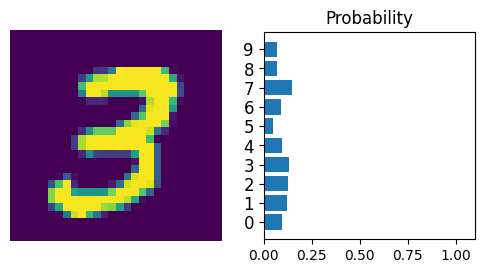

In [8]:
img = x_train[7:8,:]
logits = model(img)

# Predict the class from the network output
prediction = tf.nn.softmax(logits).numpy()

view_classification(img[0], prediction[0])

### Back Propagation
We need to now train the network to adjust its weights by first calculating Cross Entropy Loss and then back propagating the error to adjust weights

In [9]:
# Create loss_fn
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
# Train network

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [11]:
# Train model
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2133 - accuracy: 0.9365
Epoch 2/2
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0887 - accuracy: 0.9732


In [12]:
# evaluate model
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0942 - accuracy: 0.9689 - 819ms/epoch - 3ms/step


[0.09417586773633957, 0.9689000248908997]

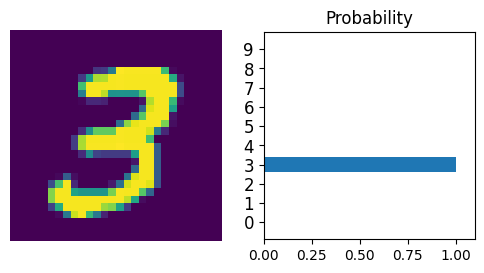

In [13]:
# check the prediction on same image as the one used before training
logits = model(img)

# Predict the class from the network output
prediction = tf.nn.softmax(logits).numpy()

view_classification(img[0], prediction[0])

We can see that model is able to correctly predict the digit as 3 after training while before training it predicting all digits with almost equal probability i.e. it was randomly predicting the digit.